In [6]:
import numpy
import pandas as pd

In [7]:
from __future__ import annotations
import numpy as np


class SimpleLinearRegression:
    def __init__(self, learning_rate: float) -> None:
        self.m = 0
        self.b = 0
        self.learning_rate = learning_rate

    def cost_function(self, x: np.ndarray, y: np.ndarray) -> float:
        total_error = 0
        for i in range(0, len(x)):
            total_error += (y[i]-(self.m*x[i]+self.b))**2
        return total_error/float(len(x))

    def fit(self, x: np.ndarray, y: np.ndarray, num_iterations: int):
        N = float(len(x))
        for j in range(num_iterations):
            b_gradient = 0
            m_gradient = 0
            for i in range(0, len(x)):
                b_gradient += -(2/N) * (y[i] - ((self.m * x[i]) + self.b))
                m_gradient += -(2/N) * x[i] * \
                    (y[i] - ((self.m * x[i]) + self.b))
            self.b -= (self.learning_rate * b_gradient)
            self.m -= (self.learning_rate * m_gradient)
        return self

    def predict(self, xs: np.ndarray) -> list:
        return [(self.m * x + self.b) for x in xs]

In [14]:
def generate_data(mean: float, std: float, size: int, seed: int = None):
    if seed is not None:
        np.random.seed(seed)
    x = np.linspace(0, 100, size)
    delta = np.random.normal(mean, std, x.size)
    y = 0.5 * x + 3 + delta
    return x, y

Error: 23.42923342690744


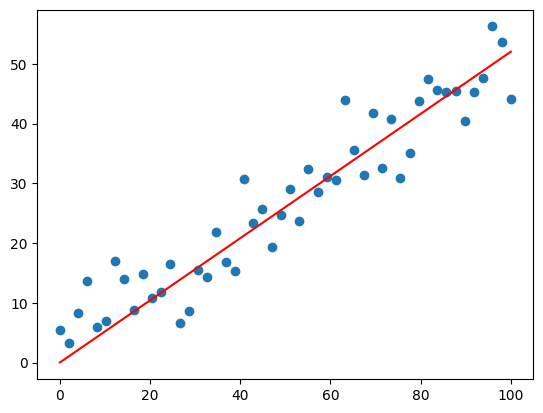

In [19]:
import matplotlib.pyplot as plt

x, y = generate_data(mean=0, std=5, size=50, seed=42)
model = SimpleLinearRegression(0.0001)
model.fit(x, y, 100)
print('Error:', model.cost_function(x, y))
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')

Error: 4.956996767100616


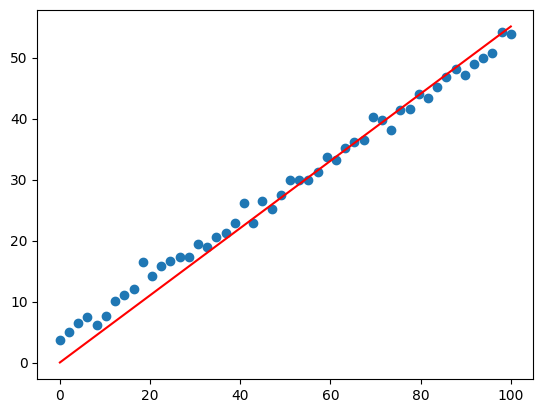

In [23]:
delta = np.random.normal(0.4, 1, x.size)  # mean=0, std=5
y = 0.5 * x + 3 + delta
model = SimpleLinearRegression(0.0001)
model.fit(x, y, 100)
print('Error:', model.cost_function(x, y))

plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [ ]:

mean_slider = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='Mean:')
std_slider = widgets.FloatSlider(value=1.0, min=0.0001, max=10.0, step=0.1, description='Std Dev:')

def update_plot(mean, std):
    x = np.linspace(0, 100, 50)
    delta = np.random.normal(mean, std, x.size)
    y = 0.5 * x + 3 + delta
    model = SimpleLinearRegression(0.0001)
    model.fit(x, y, 100)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data')
    plt.plot(x, model.predict(x), color='red', label='Model')
    plt.title(f'Error: {model.cost_function(x, y)}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

interactive_plot = widgets.interactive(update_plot, mean=mean_slider, std=std_slider)

display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='Mean:', max=10.0, min=-10.0), FloatSlider(value=1.0,…